# Exercise 2: Logistic Regression

There are two execises:

1. Exercise 1 - Logistic Regression: Build classification model of student admision based on the score of two exams; we have a dataset of 100 applicants, each one with their 2 scores and the label whether they were admited (y = 1) or not.
2. Exercise 2 - Regularized Logistic Regression: Microchips are acccepted or rejected depending on their results of two tests.

Files provided by Coursera, located under `../exercises/ex1-ex8-octave/ex2`

- `ex2.m` - Octave/MATLAB script that steps you through the exercise
- `ex2_reg.m` - Octave/MATLAB script for the later parts of the exercise
- `ex2data1.txt` - Training set for the first half of the exercise
- `ex2data2.txt` - Training set for the second half of the exercise
- `submit.m` - Submission script that sends your solutions to our servers
- `mapFeature.m` - Function to generate polynomial features
- `plotDecisionBoundary.m` - Function to plot classifier’s decision boundary

Files to complete:
- `plotData.m` - Function to plot 2D classification data
- `sigmoid.m` - Sigmoid Function
- `costFunction.m` - Logistic Regression Cost Function
- `predict.m` - Logistic Regression Prediction Function
- `costFunctionReg.m` - Regularized Logistic Regression Cost

Workflow:
- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex2.pdf`
- Whenever an exercise part is finished
  - Check it with `ex2` or `ex2_reg` in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal (**Watch out: I had to modify it to add the path of ex1/lib instead of ex2/lib**)
  - Introduce email and token
  - Results appear

**Overview of contents:**

0. Setup: `gnuplot`
1. Exercise 1: Logistic Regression
    - 1.1 Visualizing the Data: `plotData.m`
    - 1.2. Sigmoid Function: `sigmoid.m`
    - 1.3. Cost Function and Gradient: `costFunction.m`
    - 1.4. Optimization
        - 4.1 Gradient Descent: It does not work right away
        - 4.2 Advanced Optimization with `fminfunc`
        - 4.3 Python Notes: `scipy.optimize`
    - 1.5. Prediction: `predict.m`
2. Exercise 2: Regularized Logistic Regression
    - 2.1 Visualizing the Data
    - 2.2 Feature Mapping: Polynomial Logistic Regression
    - 2.3 Cost Function and Gradient with Regularization: `costFunctionReg.m`
    - 2.4 Plotting the Nonlinear Decision Boundary: `plotDecisionBoundary.m`
    - 2.5 Trying Different Regularization Parameters `lambda`
    - 2.6 Python Notes: Mapping Features & Plotting Nonlinear Decision Boundaries

# 0. Setup: `gnuplot`

In [70]:
graphics_toolkit ("gnuplot");

In [286]:
%plot -b inline:gnuplot

## 1. Exercise 1: Logistic Regression

Logistic Regression: Build classification model of student admision based on the score of two exams; we have a dataset of 100 applicants, each one with their 2 scores and the label whether they were admited (y = 1) or not.

## 1.1. Visualizing the Data: `plotData.m`

In [246]:
data = load('ex2data1.txt');       % read comma separated data
X = data(:, 1:2); y = data(:, 3);

ans = -98.970


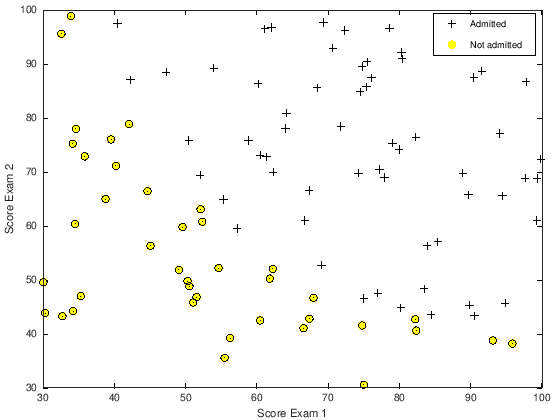

In [247]:
% Find Indices of Positive and Negative Examples
pos = find(y == 1);
neg = find(y == 0);
% Plot Examples
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
hold on;
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
xlabel('Score Exam 1'); % Set the x−axis label
ylabel('Score Exam 2'); % Set the y−axis label
legend('Admitted','Not admitted')

#### Function: `plotData()`

In [289]:
function plotData(X, y)
    figure; hold on;
    pos = find(y == 1);
    neg = find(y == 0);
    plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
    plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
    legend('Accepted','Not accepted')
    hold off;
end

## 1.2. Sigmoid Function: `sigmoid.m`

$$ h_\theta(x) = g(\theta^T x)$$

$$g(z) = \frac{1}{1+e^{-z}}$$

In [85]:
z = zeros(2,2);

In [86]:
g = zeros(size(z));

In [87]:
g = 1.0 ./ (1 .+ exp(-z));

In [197]:
g

g =

   0.5000   0.5000
   0.5000   0.5000



#### Function: `sigmoid()`

In [198]:
function g = sigmoid(z)
    g = zeros(size(z));
    g = 1.0 ./ (1 .+ exp(-z));
end

## 1.3. Cost Function and Gradient: `costFunction.m`

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [199]:
data = load('ex2data1.txt');
X = data(:, 1:2); y = data(:, 3);

In [200]:
% Number of samples and features
[m, n] = size(X);

% Add intercept term to x and X_test
% A row of X contains now a sample in the form [1 x1 x2 ... xn]
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);
theta = initial_theta;

% Compute and display initial cost and gradient
% [cost, grad] = costFunction(initial_theta, X, y);

In [201]:
h = 1.0 ./ (1 .+ exp(-X*theta)); % X*theta is mx1 -> h = sigmoid(X*theta) is mx1

In [202]:
J = (-1.0/m)*(y'*log(h) + (1.-y)'*log(1.-h))

J = 0.6931


In [203]:
e = (h-y); % m x 1

In [204]:
gradJ = (1.0/m)*e'*X % 1 x (n+1)

gradJ =

   -0.1000  -12.0092  -11.2628



In [205]:
size(X)

ans =

   100     3



#### Function: `costFunction()` 

In [212]:
function [J, grad] = costFunction(theta, X, y)
    m = length(y); % number of training examples
    J = 0;
    grad = zeros(size(theta));

    %h = 1.0 ./ (1 .+ exp(-X*theta)); % X*theta is mx1 -> h = sigmoid(X*theta) is mx1
    h = sigmoid(X*theta); % X*theta is mx1 -> h = sigmoid(X*theta) is mx1
    J = (-1.0/m)*(y'*log(h) + (1.-y)'*log(1.-h));
    e = (h-y); % m x 1
    grad = (1.0/m)*e'*X; % 1 x (n+1)
end

## 1.4. Optimization

### 1.4.1 Gradient Descent

**Important note: it does not work right away!**

In [272]:
alpha = 0.001;
steps = 100;

data = load('ex2data1.txt');
X = data(:, 1:2); y = data(:, 3);
[m, n] = size(X);
X = [ones(m, 1) X];

theta = zeros(n + 1, 1);

J_history = zeros(steps,1);

for i = 1:steps
    % Compute cost and gradient
    [J, gradJ] = costFunction(theta, X, y);
    % Save history of cost
    J_history(i,1) = J;
    % Update theta
    theta = theta - alpha*gradJ';
end

theta

theta =

  -6.9117e-03
   1.0461e-02
   4.9527e-04



In [251]:
min(min(J_history))

ans = 0.6293


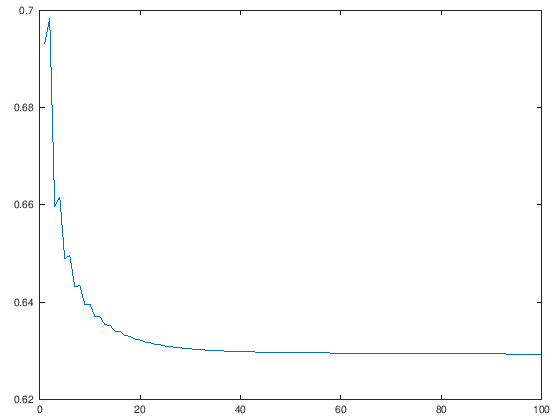

In [252]:
figure
plot([1:steps],J_history)

#### Plot

**The result is not correct!**

In [253]:
% Boundary : theta^T*X = 0
% t0 + t1*x1 + t2*x2 = 0 -> x2 = (-1/t2)*(t0 + t1*x1)
x1 = 30:0.1:100;
x2 = (-1.0/theta(3))*(theta(1) + theta(2)*x1);

ans = -98.550


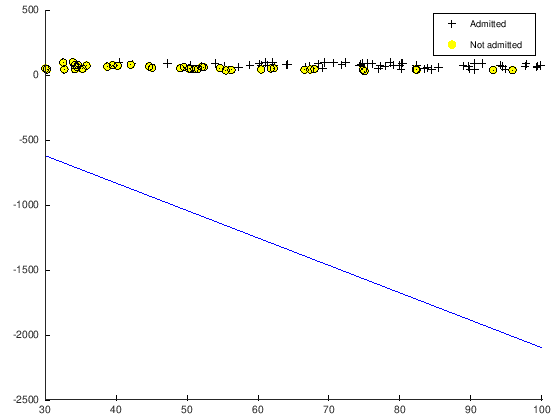

In [261]:
plotData(X(:,2:size(X,2)),y)
hold on;
plot(x1, x2, 'b-')

### 1.4.2 Advanced Optimization with `fminfunc`

**The result is OK -- It works with advanced optimization**

In [238]:
data = load('ex2data1.txt');
X = data(:, 1:2); y = data(:, 3);
[m, n] = size(X);
X = [ones(m, 1) X];

In [267]:
% Options:
% GradObj on: our function returns cost and gradient
% MaxIter: maximum iterations
% @(t)(costFunction(t, X, y)): function with parameter t -> the value of t for min costFunction will be found
% initialTheta: initial value of t
options = optimset('GradObj', 'on', 'MaxIter', 400);
initial_theta = zeros(3,1);
[optTheta, functionVal, exitFlag] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

In [268]:
optTheta

optTheta =

  -25.1613
    0.2062
    0.2015



In [269]:
functionVal

functionVal = 0.2035


In [270]:
% Boundary : theta^T*X = 0
% t0 + t1*x1 + t2*x2 = 0 -> x2 = (-1/t2)*(t0 + t1*x1)
x1 = 30:0.1:100;
x2 = (-1.0/optTheta(3))*(optTheta(1) + optTheta(2)*x1);

ans = -98.024


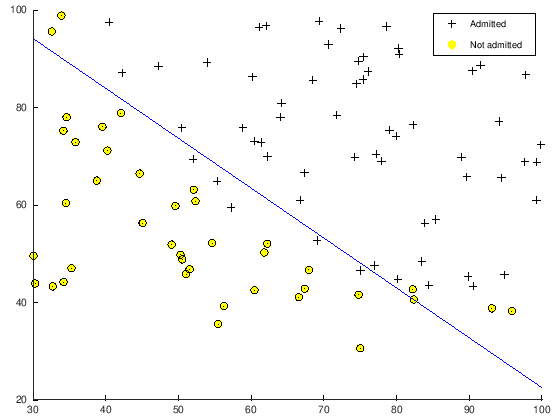

In [273]:
plotData(X(:,2:size(X,2)),y)
hold on;
plot(x1, x2, 'b-')

### 1.4.3 Python Notes: `scipy.optimize`

It seems that we need to use an advanced optimization method if we want to compute the parameters of logistic regression.

In python that can be done with `scipy.optimize`.

See the python eercise repository for more information.

A brief summary of the code would be the following:

```python

from scipy import optimize

def costFunction(theta, X, y):
    m = y.size  # number of training examples
    J = 0
    grad = np.zeros(theta.shape)
    # IMPLEMENTATION ...
    return J, grad

options= {'maxiter': 400}
# Truncated Newton algorithm (TNC) is equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
# jac=True: Jacobian / Gradient returned
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun
theta = res.x
```

## 1.5. Prediction: `predict.m`

In [274]:
% Student with 45 in exam 1, 85 in exam 2 -> predict whether he/she passes
x = [1 45 85];

In [277]:
h = sigmoid(x*optTheta) % if h > 0.5 -> y_hat = 1

h = 0.7763


In [278]:
if (h > 0.5)
    disp('Pass!')
else
    disp('Not passed!')
end

Pass!


In [281]:
p = sigmoid(X*optTheta);

In [284]:
y_hat = p >= 0.5;

In [285]:
% Accuracy of training
mean(y == y_hat)

ans = 0.8900


## Exercise 2: Regularized Logistic Regression

Regularized Logistic Regression: Microchips are acccepted or rejected depending on their results of two tests.

The decision boundary is not linear anymore!

## 2.1 Visualizing the Data

In [287]:
data = load('ex2data2.txt');
X = data(:, 1:2); y = data(:, 3);

ans = -98.828


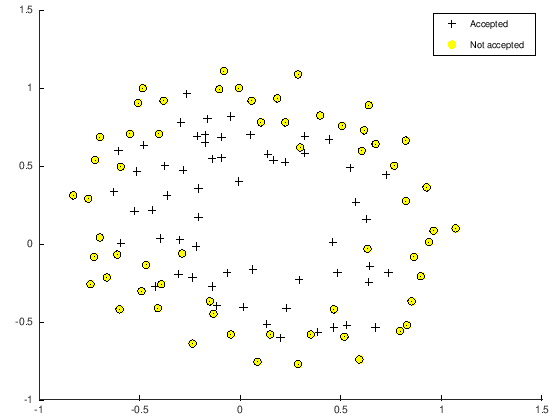

In [290]:
plotData(X,y)

## 2.2 Feature Mapping: Polynomial Logistic Regression

In [296]:
% Util file from the exercise kit
% [X1, X2] transformed into a 28-dimensional feature array!
% This allows for non-linear decision boundaries
% but overfitting risk arises!
function out = mapFeature(X1, X2)
    % MAPFEATURE Feature mapping function to polynomial features
    %
    %   MAPFEATURE(X1, X2) maps the two input features
    %   to quadratic features used in the regularization exercise.
    %
    %   Returns a new feature array with more features, comprising of 
    %   X1, X2, X1.^2, X1*X2, X2.^2, X1.^3, ... , X1*X2.^5, X2.^6
    %
    %   Inputs X1, X2 must be the same size
    %
    degree = 6;
    out = ones(size(X1(:,1)));
    for i = 1:degree
        for j = 0:i
            out(:, end+1) = (X1.^(i-j)).*(X2.^j);
        end
    end
end

## 2.3 Cost Function and Gradient with Regularization: `costFunctionReg.m`

Formulae for the cost function and its gradient. Note that $\theta_0$ is not used for regularization:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

In [306]:
function [J, grad] = costFunctionReg(theta, X, y, lambda)
    m = length(y); % number of training examples
    n = length(theta) - 1;
    J = 0;
    grad = zeros(size(theta));

    %h = 1.0 ./ (1 .+ exp(-X*theta)); % X*theta is mx1 -> h = sigmoid(X*theta) is mx1
    h = sigmoid(X*theta); % X*theta is mx1 -> h = sigmoid(X*theta) is mx1
    J = (-1.0/m)*(y'*log(h) + (1.-y)'*log(1.-h));
    e = (h-y); % m x 1
    grad = (1.0/m)*e'*X; % 1 x (n+1)
    
    % Regularization terms
    % Cost    
    % theta'*theta, but without theta_0
    J = J + (0.5*lambda/m)*theta(2:(n+1))'*theta(2:(n+1));
    % Gradient
    t = (lambda/m)*theta'; % 1 x (n+1)
    t(1) = 0; % remove theta_0
    grad = grad + t;
end

In [314]:
data = load('ex2data2.txt');
X = data(:, 1:2); y = data(:, 3);

X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

In [315]:
cost

cost = 0.6931


## 2.4 Plotting the Nonlinear Decision Boundary: `plotDecisionBoundary.m`

In [310]:
% This a utility function provided in the course
% It is interesting to have it since curvy contours are ploted
% if nonlinear decision boundaries are created,
% i.e., when we have more than two features.


function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end


### Optimize & Plot

In [318]:
data = load('ex2data2.txt');
X = data(:, 1:2); y = data(:, 3);

X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

ans = -98.659


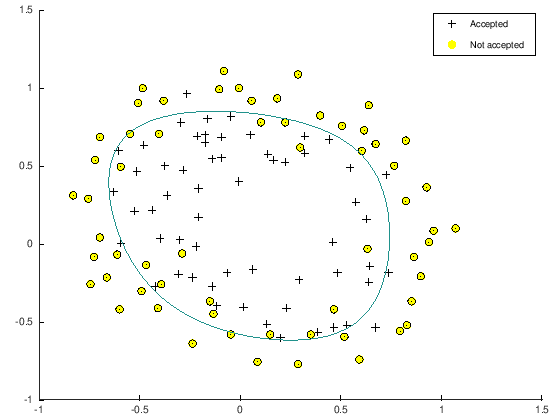

In [319]:
plotDecisionBoundary(theta, X, y)

## 2.5 Trying Different Regularization Parameters `lambda`

Optimally `1 - alpha*lambda/m --> 0.99`.
However, since we are using an advanced optimization method, we have no `alpha`.

In [320]:
data = load('ex2data2.txt');
X = data(:, 1:2); y = data(:, 3);
X = mapFeature(X(:,1), X(:,2));
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);
% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

In [322]:
% No regularization: Overfittig
lambda = 0;
% Optimize
[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

ans = -98.283


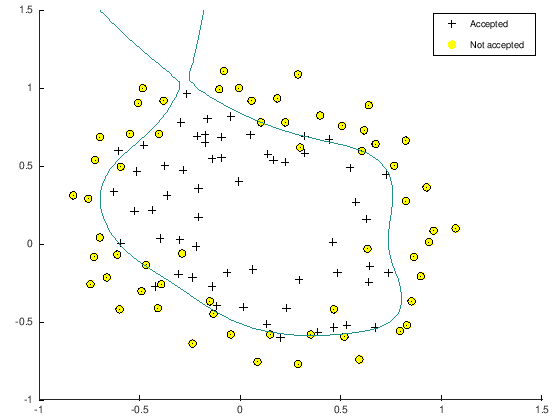

In [323]:
plotDecisionBoundary(theta, X, y)

In [326]:
% Too much regularization: Underfittig
lambda = 100;
% Optimize
[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

ans = -98.518


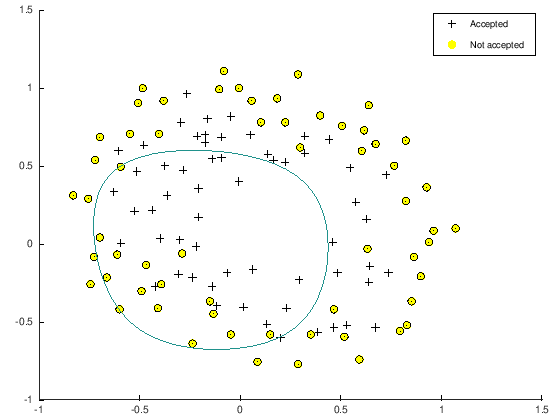

In [327]:
plotDecisionBoundary(theta, X, y)

## 2.6 Python Notes: Mapping Features & Plotting Nonlinear Decision Boundaries

The following is the translation of the above functions `mapFeature()` and `plotDecisionBoundary()` to python.
The code is from [ml-coursera-python-assignments](https://github.com/mxagar/ml-coursera-python-assignments), forked from dibgerge's repository on Github.

```python
import numpy as np
from matplotlib import pyplot

def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)


def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.

    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.

    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        pyplot.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

```